In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
water_df = pd.read_csv("water_potability.csv")
water_df.iloc[:50]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
# Know about the dataset
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
label_count = water_df["Potability"].value_counts() 
label_count

0    1998
1    1278
Name: Potability, dtype: int64

In [5]:
water_df.loc[water_df.Potability == 1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# WHO Standards for the potable water
* PH between 6.50 - 8.50 pH
* Choramines <= 4 mg/L (CDC)
* Conductivity <=400 mueS/cm (WHO)
* Trihalomethanes <= 80 ppm (US)
* Solids between 500 - 1000 mg/L (WHO)
* Organic Cabon < 2 mg/L (US)
* Turbidity < 5 NTU (WHO)

In [6]:
# Find any null values in the dataset
clean_water = water_df.copy()
clean_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# Drop null values
clean_water.dropna(inplace = True)
# clean_water.drop('Solids', axis = 1, inplace = True)

In [8]:
# # find the mean values of the features
# clean_water

In [9]:
# Fill null with mean values of each features
# clean_water.Trihalomethanes.fillna(1, inplace = True)
# clean_water.Sulfate.fillna(129, inplace = True)
# clean_water.ph.fillna(0, inplace = True)

In [10]:
clean_water.corr()[["Potability"]]

,Potability
ph,0.014530
Hardness,-0.001505
Solids,0.040674
Chloramines,0.020784
Sulfate,-0.015303
Conductivity,-0.015496
Organic_carbon,-0.015567
Trihalomethanes,0.009244
Turbidity,0.022682
Potability,1.000000


In [11]:
# Split the features columns into features and target
X = clean_water.drop('Potability', axis = 1)
y = clean_water["Potability"]

In [12]:
# Use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45, test_size=0.20)

In [13]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Automated Neural Network Model
import tensorflow as tf

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=9))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=4),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [15]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    factor = 3,
    max_epochs=20,
    hyperband_iterations=2)

In [16]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.6724565625190735

Best val_accuracy So Far: 0.7394540905952454
Total elapsed time: 00h 02m 04s
INFO:tensorflow:Oracle triggered exit


In [17]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: relu
first_units: 26
num_layers: 2
units_0: 21
units_1: 17
units_2: 13
units_3: 9
units_4: 9
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 4e17b2c70b4c3327c6fcf9e240ff7498
Score: 0.7394540905952454
Trial summary
Hyperparameters:
activation: relu
first_units: 26
num_layers: 3
units_0: 25
units_1: 21
units_2: 25
units_3: 17
units_4: 13
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7121587991714478
Trial summary
Hyperparameters:
activation: tanh
first_units: 26
num_layers: 3
units_0: 29
units_1: 29
units_2: 13
units_3: 29
units_4: 13
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: e528a4e140ca787aa419020339ef7a4e
Score: 0.7096773982048035
Trial summary
Hyperparameters:
activation: relu
first_units: 11
num_layers: 1
un

In [44]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create sequential model
model = tf.keras.models.Sequential()

# Create first layer of input
model.add(tf.keras.layers.Dense(units = 11, activation = 'relu', input_dim=9))

# Create hidden layers 
# model.add(tf.keras.layers.Dense(units = 17, activation = 'relu'))
# model.add(tf.keras.layers.Dense(units = 21, activation = 'relu'))
# model.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))

# Create ouput layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Structure of sequential model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 12        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
# lr = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, name='Adam')
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

# Fit the model
fit_model = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.02) 

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.7924 - accuracy: 0.5238 - val_loss: 0.6973 - val_accuracy: 0.6061
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.5352 - val_loss: 0.6822 - val_accuracy: 0.6061
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.5435 - val_loss: 0.6729 - val_accuracy: 0.6061
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.5543 - val_loss: 0.6706 - val_accuracy: 0.5758
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5714 - val_loss: 0.6690 - val_accuracy: 0.5758
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5790 - val_loss: 0.6676 - val_accuracy: 0.5455
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5784 - val_loss: 0.6687 - val_accuracy: 0.5455
Epoch 8/100
5

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Tain Loss: {model_loss}, Train Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")

51/51 - 0s - loss: 0.5720 - accuracy: 0.7058
Tain Loss: 0.5719649791717529, Train Accuracy: 0.7058457732200623
13/13 - 0s - loss: 0.5752 - accuracy: 0.7171
Test Loss: 0.5751603245735168, Test Accuracy: 0.7171216011047363


<AxesSubplot:>

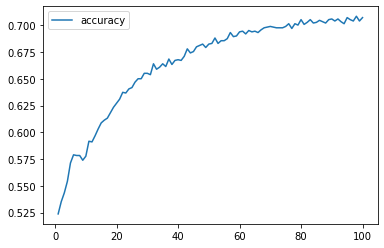

In [47]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_scaled, y_train)


print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.5970149253731343
Testing Data Score: 0.6401985111662531
